In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
import itertools
import seaborn as sns
import math

#from yahoofinancials import YahooFinancials

In [4]:
import warnings

# Ignorar todos os avisos
warnings.filterwarnings("ignore")


referencia: https://www.anpec.org.br/revista/vol14/vol14n1p521_546.pdf


## conceitos chave

#### cointegração:
relação estatística onde duas séries temporais que são integradadas de mesma ordem $d$ podem ser combinadas linearmente
para produzirem uma única série integrada de ordem $d-b$, onde $(d > b > 0)$

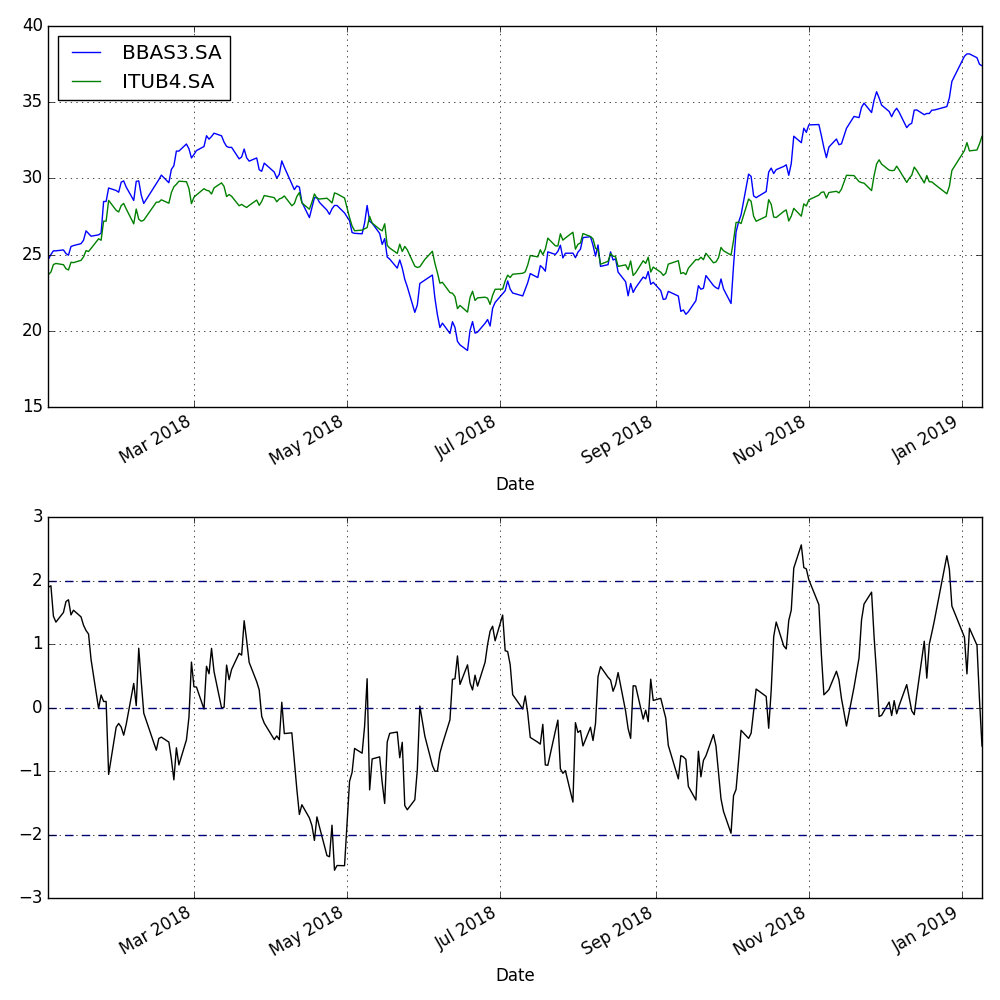

In [5]:
tickers_ibov = [
'ALPA4',
'ABEV3',
'AMER3',
'B3SA3',
'BPAN4',
'BBSE3',
'BRML3',
'BBDC3',
'BBDC4',
'BRAP4',
'BBAS3',
'BRKM5',
'BRFS3',
'CCRO3',
'FLRY3',
'GGBR4',
'GOAU4',
'GOLL4',
'HYPE3',
'IGTA3',
'ITSA4',
'ITUB4',
'JBSS3',
'JHSF3',
'KLBN11',
'RENT3',
'LCAM3',
'LAME4',
'LREN3',
'MGLU3',
'MRFG3',
'BEEF3',
'MRVE3',
'MULT3',
#'PCAR3',
'PETR3',
'PETR4',
'PRIO3',
'QUAL3',
'RADL3',
'RAIL3',
'SBSP3',
'SANB11',
'CSNA3',
'SULA11',
'SUZB3',
'TAEE11',
'VIVT3',
'TIMS3',
'TOTS3',
'UGPA3',
'USIM5',
'VALE3',
'VIIA3',
'WEGE3',
'YDUQ3',
'BOVA11',
'IVVB11',
]


In [6]:
tickers_yf = [i + '.SA' for i in tickers_ibov]
ibov= yf.download(tickers_yf, start='2018-01-01', end='2024-01-01')

[*********************100%%**********************]  57 of 57 completed

6 Failed downloads:
['IGTA3.SA', 'LCAM3.SA', 'LAME4.SA', 'VIIA3.SA', 'BRML3.SA', 'SULA11.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [7]:
close_prices = ibov['Adj Close']

In [8]:
close_prices.drop(columns=['IGTA3.SA', 'VIIA3.SA', 'SULA11.SA', 'LAME4.SA', 'BRML3.SA', 'LCAM3.SA'], inplace=True)

In [9]:
close_prices.isna().sum()

Ticker
ABEV3.SA      0
ALPA4.SA      0
AMER3.SA      0
B3SA3.SA      0
BBAS3.SA      0
BBDC3.SA      0
BBDC4.SA      0
BBSE3.SA      0
BEEF3.SA      0
BOVA11.SA    18
BPAN4.SA      0
BRAP4.SA      0
BRFS3.SA      0
BRKM5.SA      0
CCRO3.SA      0
CSNA3.SA      0
FLRY3.SA      0
GGBR4.SA      0
GOAU4.SA      0
GOLL4.SA      0
HYPE3.SA      0
ITSA4.SA      0
ITUB4.SA      0
IVVB11.SA    18
JBSS3.SA      0
JHSF3.SA      0
KLBN11.SA     0
LREN3.SA      0
MGLU3.SA      0
MRFG3.SA      0
MRVE3.SA      0
MULT3.SA      0
PETR3.SA      0
PETR4.SA      0
PRIO3.SA      0
QUAL3.SA      0
RADL3.SA      0
RAIL3.SA      0
RENT3.SA      0
SANB11.SA     0
SBSP3.SA      0
SUZB3.SA      0
TAEE11.SA     0
TIMS3.SA      0
TOTS3.SA      0
UGPA3.SA      0
USIM5.SA      0
VALE3.SA      0
VIVT3.SA      0
WEGE3.SA      0
YDUQ3.SA      0
dtype: int64

In [36]:
close_prices[close_prices['IVVB11.SA'].isna()]

Ticker,ABEV3.SA,ALPA4.SA,AMER3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BOVA11.SA,...,SUZB3.SA,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-25,17.401134,12.307033,19.572929,6.955762,26.309624,16.257191,17.054327,18.574789,7.629765,NaN,...,18.945770,11.285131,10.163839,10.353367,15.647236,9.158912,26.217085,28.767113,8.698215,28.208895
2018-02-05,17.289337,12.008728,20.398872,6.697643,26.371952,15.510715,16.205076,18.247786,7.606406,NaN,...,19.099949,10.989019,10.226628,9.888293,15.326605,9.207543,25.319754,29.290155,7.859832,30.048983
2018-03-01,17.815672,13.257059,22.588581,6.880476,29.155964,15.804579,16.715237,17.608536,7.084780,NaN,...,19.281338,11.213841,11.011480,9.519978,14.331871,9.564175,27.892521,27.976028,8.132308,29.207058
2018-03-02,18.007069,13.257059,22.953533,6.958450,29.396765,15.995147,16.822033,17.602509,7.271632,NaN,...,19.771078,11.405765,10.995780,9.466916,14.322094,9.191333,27.453266,27.982557,8.086898,28.773075
2018-03-05,17.959217,13.401567,23.164822,7.044487,29.640570,16.212448,16.933552,17.735130,7.240490,NaN,...,19.426443,11.279645,11.074265,9.404489,14.175452,9.029230,27.421894,28.754045,7.978960,28.816469
2019-02-18,14.932089,15.479224,45.590137,8.859821,39.206028,19.316002,21.918243,18.522726,4.702426,NaN,...,41.829113,16.047337,9.584297,10.696156,11.036057,7.687994,29.544821,30.062588,8.819140,27.177689
2019-02-21,15.038802,15.487119,42.507256,8.965129,38.433033,19.485655,21.927988,18.181076,4.788066,NaN,...,43.414791,15.678354,9.907816,10.569946,10.299263,7.794657,29.629698,30.589750,8.726693,26.433857
2019-02-22,15.038802,15.052974,44.629738,9.197919,38.785080,19.446867,21.747583,18.355253,4.749138,NaN,...,43.287209,15.715883,10.029138,10.699309,10.596358,8.139263,30.680910,30.945944,8.805275,26.777878
2019-02-28,14.144027,15.139802,46.435287,9.087069,36.965988,18.676176,21.099052,18.288261,4.967132,NaN,...,43.433018,15.615820,9.560032,11.500731,10.578531,7.925936,30.752729,30.725101,8.551291,25.615644


In [10]:
def stationarity_bool(a, cutoff = 0.05):
  a = np.ravel(a)
  if adfuller(a)[1] < cutoff:
    return True
  else:
    return False

  ## OLS implementation
def ols(y, x):

  """
  ordinary least squares regression function
  """
  n = len(x)
  beta = (n*np.sum(x * y)-np.sum(y)*np.sum(x)  )/( n*np.sum(x**2) - np.sum(x)**2 )

  alpha = np.mean(y) - beta* np.mean(x)

  resid = y - (beta*x + alpha)
  return beta, alpha, resid

def calc_half_life(resid):
  lag_resid = resid.shift(1).bfill()
  delta_resid = resid  - lag_resid

  beta, alpha, resid = ols(delta_resid, lag_resid)
  half = -1* np.log(2)/beta
  return half

In [11]:
base_treino = close_prices.loc['2020':'2021-01-01']
base_teste = close_prices.loc['2021-01-01':'2024-01-01']

In [43]:
all_pairs

[('ABEV3.SA', 'ALPA4.SA'),
 ('ABEV3.SA', 'AMER3.SA'),
 ('ABEV3.SA', 'B3SA3.SA'),
 ('ABEV3.SA', 'BBAS3.SA'),
 ('ABEV3.SA', 'BBDC3.SA'),
 ('ABEV3.SA', 'BBDC4.SA'),
 ('ABEV3.SA', 'BBSE3.SA'),
 ('ABEV3.SA', 'BEEF3.SA'),
 ('ABEV3.SA', 'BPAN4.SA'),
 ('ABEV3.SA', 'BRAP4.SA'),
 ('ABEV3.SA', 'BRFS3.SA'),
 ('ABEV3.SA', 'BRKM5.SA'),
 ('ABEV3.SA', 'CCRO3.SA'),
 ('ABEV3.SA', 'CSNA3.SA'),
 ('ABEV3.SA', 'FLRY3.SA'),
 ('ABEV3.SA', 'GGBR4.SA'),
 ('ABEV3.SA', 'GOAU4.SA'),
 ('ABEV3.SA', 'GOLL4.SA'),
 ('ABEV3.SA', 'HYPE3.SA'),
 ('ABEV3.SA', 'ITSA4.SA'),
 ('ABEV3.SA', 'ITUB4.SA'),
 ('ABEV3.SA', 'JBSS3.SA'),
 ('ABEV3.SA', 'JHSF3.SA'),
 ('ABEV3.SA', 'KLBN11.SA'),
 ('ABEV3.SA', 'LREN3.SA'),
 ('ABEV3.SA', 'MGLU3.SA'),
 ('ABEV3.SA', 'MRFG3.SA'),
 ('ABEV3.SA', 'MRVE3.SA'),
 ('ABEV3.SA', 'MULT3.SA'),
 ('ABEV3.SA', 'PETR3.SA'),
 ('ABEV3.SA', 'PETR4.SA'),
 ('ABEV3.SA', 'PRIO3.SA'),
 ('ABEV3.SA', 'QUAL3.SA'),
 ('ABEV3.SA', 'RADL3.SA'),
 ('ABEV3.SA', 'RAIL3.SA'),
 ('ABEV3.SA', 'RENT3.SA'),
 ('ABEV3.SA', 'SANB11.SA'),

In [13]:
pares_cointegrados = []
all_pairs =  list(itertools.combinations(base_treino.columns,2))
print(all_pairs)
for pair in all_pairs:
  beta, alpha, resid = ols(base_treino[pair[0]], base_treino[pair[1]])

  if stationarity_bool(resid):
    meia_vida = calc_half_life(resid)
    pares_cointegrados.append([pair[0], pair[1], meia_vida])

print('total_de_pares', len(all_pairs))
print('pares_coint', len(pares_cointegrados))

[('ABEV3.SA', 'ALPA4.SA'), ('ABEV3.SA', 'AMER3.SA'), ('ABEV3.SA', 'B3SA3.SA'), ('ABEV3.SA', 'BBAS3.SA'), ('ABEV3.SA', 'BBDC3.SA'), ('ABEV3.SA', 'BBDC4.SA'), ('ABEV3.SA', 'BBSE3.SA'), ('ABEV3.SA', 'BEEF3.SA'), ('ABEV3.SA', 'BOVA11.SA'), ('ABEV3.SA', 'BPAN4.SA'), ('ABEV3.SA', 'BRAP4.SA'), ('ABEV3.SA', 'BRFS3.SA'), ('ABEV3.SA', 'BRKM5.SA'), ('ABEV3.SA', 'CCRO3.SA'), ('ABEV3.SA', 'CSNA3.SA'), ('ABEV3.SA', 'FLRY3.SA'), ('ABEV3.SA', 'GGBR4.SA'), ('ABEV3.SA', 'GOAU4.SA'), ('ABEV3.SA', 'GOLL4.SA'), ('ABEV3.SA', 'HYPE3.SA'), ('ABEV3.SA', 'ITSA4.SA'), ('ABEV3.SA', 'ITUB4.SA'), ('ABEV3.SA', 'IVVB11.SA'), ('ABEV3.SA', 'JBSS3.SA'), ('ABEV3.SA', 'JHSF3.SA'), ('ABEV3.SA', 'KLBN11.SA'), ('ABEV3.SA', 'LREN3.SA'), ('ABEV3.SA', 'MGLU3.SA'), ('ABEV3.SA', 'MRFG3.SA'), ('ABEV3.SA', 'MRVE3.SA'), ('ABEV3.SA', 'MULT3.SA'), ('ABEV3.SA', 'PETR3.SA'), ('ABEV3.SA', 'PETR4.SA'), ('ABEV3.SA', 'PRIO3.SA'), ('ABEV3.SA', 'QUAL3.SA'), ('ABEV3.SA', 'RADL3.SA'), ('ABEV3.SA', 'RAIL3.SA'), ('ABEV3.SA', 'RENT3.SA'), ('ABEV3.

In [14]:
pares_coint_df = pd.DataFrame(pares_cointegrados, columns=['par1', 'par2', 'meia_vida'])

In [16]:
pares_coint_df.meia_vida.max()

39.0728795072758

In [13]:
pares_coint_df.meia_vida = pares_coint_df.meia_vida.apply(lambda x: math.ceil(x))

In [14]:
pares_filtrado = pares_coint_df.copy(deep=True)

In [72]:
pares_filtrado = pares_filtrado.sample(n=100)

In [63]:
print(end_test_date, base_teste.index.max())

2022-04-04 00:00:00 2023-12-28 00:00:00


In [254]:
base_teste = close_prices.copy(deep=True)

In [62]:
stationarity_bool(treino[pair2].diff().dropna())

True

In [17]:
# aqui ainda falta arrumar o recalculo da meia vida para cada shift de treino. o shift temporal
# vai acabar dando merda (vai pegar um dia que não existe apenas somando offset)


# inicializacao de variaveis temporais para a estrategia
# uso 12 meses de dado para avaliacao da cointegracao 

# treino aqui é o periodo de estimacao de cointegracao dos pares
# teste é o periodo de trading, 3 meses subsequentes ao treino
start_treino_date = base_teste.index.min()
end_treino_date = base_teste.index.min() + pd.DateOffset(months=12)
start_test_date = end_treino_date
end_test_date = start_test_date + pd.DateOffset(months=3)
resultados = pd.DataFrame(columns=['par', 'entrada', 'saida', 'preco_entrada_long', 'preco_entrada_short', 'preco_saida_long', 'preco_saida_short'])

#for pair1, pair2 in list(zip(pares_filtrado.par1.to_list(), pares_filtrado.par2.to_list())):

for pair1, pair2 in all_pairs:
  # reinicializar datas a cada novo par
  start_treino_date = base_teste.index.min()
  end_treino_date = base_teste.index.min() + pd.DateOffset(months=12)
  start_test_date = end_treino_date
  end_test_date = start_test_date + pd.DateOffset(months=3)
  while (end_test_date < base_teste.index.max()):


    treino = base_teste.loc[start_treino_date:end_treino_date]
    teste = base_teste.loc[start_test_date:end_test_date]




    beta_treino, alpha_treino, resid_treino = ols(treino[pair1], treino[pair2] )

    # teste de I(1)

    test1 = stationarity_bool(treino[pair1].diff().dropna())
    test2 = stationarity_bool(treino[pair2].diff().dropna())
    resid_teste = stationarity_bool(resid_treino)

    if not (resid_teste  and test1 and test2):

      #print(f"estacionaridade residuo {resid_teste}")
      #print(f"par 1 é I(1) {test1}")
      #print(f"par 2 é I(2) {test2}")

     # print(f"par {pair1}, {pair2} nao cointegrado no periodo")
      start_treino_date = start_treino_date + pd.DateOffset(months=3)
      end_treino_date = start_treino_date + pd.DateOffset(months=12)
      start_test_date = end_treino_date
      end_test_date = start_test_date + pd.DateOffset(months=3)
      #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
      #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")
      continue

    print(f"par {pair1}, {pair2} cointegrado")
    beta, alpha, resid = ols(teste[pair1], teste[pair2])
    half_life = math.ceil(calc_half_life(resid))

    sigma = resid_treino.std()
    mean = resid_treino.mean()


    # avaliacao do spread acima da média
    norm_resid = (resid - mean)/sigma
    x = norm_resid.to_frame('norm_resid')
    x['entrada_up'] = np.where((x.norm_resid >= 2) & (x.norm_resid.shift() <= 2), x.norm_resid,0 )
    x['entrada_down']= np.where((x.norm_resid <= -2) & (x.norm_resid.shift() >= -2), x.norm_resid,0 )
    x['saida_up'] = 0
    x['saida_down'] = 0
    x['p_saida_long_up'] = 0
    x['p_saida_long_down'] = 0
    x['p_saida_short_up'] = 0
    x['p_saida_short_down'] = 0

    trades = []

    periodo_trade = list(x.entrada_up[x.entrada_up != 0].index)

    if len(periodo_trade) == 0:
      print(f"par {pair1}, {pair2} sem pontos de entrada up")
      start_treino_date = start_treino_date + pd.DateOffset(months=3)
      end_treino_date = start_treino_date + pd.DateOffset(months=12)
      start_test_date = end_treino_date
      end_test_date = start_test_date + pd.DateOffset(months=3)
      #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
      #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")
      continue
    aux_teste = teste.reset_index()
    pares = pair1 + '_' + pair2


    # data auxiliar para depois nao haver trades em periodo conflitante

    # preciso fazer isso mesmo?
    t = x.entrada_up[x.entrada_up != 0].index[0] + pd.DateOffset(days=1)
    for data  in periodo_trade:

      if data <= t:
        continue
      test = teste.loc[data:]
      aux_teste = teste.reset_index()
      try:
        data_meia_vida = aux_teste.loc[aux_teste[aux_teste.Date == data].index[0] + half_life]['Date']

      # caso o range da meia vida passe, pegar ultimo dia disponível da série. 
      except:
        data_meia_vida = teste.index.max()
      if data_meia_vida >= pd.Timestamp(teste.index.max()):
        data_meia_vida = teste.index.max()

      p_entrada_long = teste[pair2].loc[data]
      p_entrada_short = teste[pair1].loc[data]
      for t in  teste.loc[data:data_meia_vida].index:
        p_saida_long = p_saida_short = 0
        if (x.loc[t].norm_resid <= 0.5):
            
            tipo = "concluido"
            print('achou_ponto_de_saida')
            p_saida_long = teste[pair2].loc[t]
            p_saida_short = teste[pair1].loc[t]
            x['saida_up'].loc[t] = x.loc[t].norm_resid
            x['p_saida_long_up'].loc[t] = p_saida_long
            x['p_saida_short_up'].loc[t] = p_saida_long
            trades.append([pares,data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])

            break
        else:
          pass

      if (p_saida_long == 0):
        print('chegou_na_meia_vida')
        tipo = "meia vida"
        p_saida_long = teste[pair2].loc[data_meia_vida]
        p_saida_short = teste[pair1].loc[data_meia_vida]
        x['saida_up'].loc[t] = x.loc[data_meia_vida].norm_resid
        x['p_saida_long_up'].loc[t] = p_saida_long
        x['p_saida_short_up'].loc[t] = p_saida_long
        trades.append([pair1+ '_' + pair2,data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])


    # trades na ponta down
        
    
    periodo_trade = list(x.entrada_down[x.entrada_down != 0].index)

    if len(periodo_trade) == 0:
      print(f"par {pair1}, {pair2} sem pontos de entrada down")
      start_treino_date = start_treino_date + pd.DateOffset(months=3)
      end_treino_date = start_treino_date + pd.DateOffset(months=12)
      start_test_date = end_treino_date
      end_test_date = start_test_date + pd.DateOffset(months=3)
      #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
      #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")
      continue

    t = x.entrada_down[x.entrada_down != 0].index[0] + pd.DateOffset(days=1)

    for data  in periodo_trade:

      if data <= t:
        continue
      try:
        data_meia_vida = aux_teste.loc[aux_teste[aux_teste.Date == data].index[0] + half_life]['Date']
      except:
        data_meia_vida = teste.index.max()

      p_entrada_long = teste[pair1].loc[data]
      p_entrada_short = teste[pair2].loc[data]
      for t in  teste.loc[data:data_meia_vida].index:
        p_saida_long = p_saida_short = 0
        if (x.loc[t].norm_resid >= -0.5):
            
            tipo = "down concluido"
            p_saida_long = teste[pair1].loc[t]
            p_saida_short = teste[pair2].loc[t]
            x['saida_down'].loc[t] = x.loc[t].norm_resid
            x['p_saida_long_down'].loc[t] = p_saida_long
            x['p_saida_short_down'].loc[t] = p_saida_short
            # nome do par, data de entrada, data de saida, preco de entrada long, preco de entrada short, p saida long, p saida short
            trades.append([pair1 +'_' + pair2,data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])
            break

      if (p_saida_long == 0):

        tipo = "meia vida down"
        p_saida_long = teste[pair1].loc[data_meia_vida]
        p_saida_short = teste[pair2].loc[data_meia_vida]
        x['saida_down'].loc[t] = x.loc[data_meia_vida].norm_resid
        x['p_saida_long_down'].loc[t] = p_saida_long
        x['p_saida_short_down'].loc[t] = p_saida_short
        trades.append([pair1 + '_' + pair2, data, t, p_entrada_long, p_entrada_short, p_saida_long, p_saida_short, tipo])

    resultados = pd.concat([resultados,pd.DataFrame(trades, columns=['par', 'entrada', 'saida', 
                                          'preco_entrada_long', 'preco_entrada_short', 'preco_saida_long', 'preco_saida_short', "tipo"])])
    
    # update
    start_treino_date = start_treino_date + pd.DateOffset(months=3)
    end_treino_date = start_treino_date + pd.DateOffset(months=12)
    start_test_date = end_treino_date
    end_test_date = start_test_date + pd.DateOffset(months=3)

    #print(f"update de data, periodo de estimacao: {start_treino_date}, {end_treino_date}")
    #print(f"update de data, periodo de trading: {start_test_date} - {end_test_date}")


par ABEV3.SA, ALPA4.SA cointegrado
par ABEV3.SA, ALPA4.SA sem pontos de entrada up
par ABEV3.SA, ALPA4.SA cointegrado
par ABEV3.SA, ALPA4.SA sem pontos de entrada up
par ABEV3.SA, ALPA4.SA cointegrado
par ABEV3.SA, ALPA4.SA sem pontos de entrada up
par ABEV3.SA, AMER3.SA cointegrado
par ABEV3.SA, AMER3.SA sem pontos de entrada up
par ABEV3.SA, AMER3.SA cointegrado
par ABEV3.SA, AMER3.SA sem pontos de entrada up
par ABEV3.SA, AMER3.SA cointegrado
par ABEV3.SA, AMER3.SA sem pontos de entrada up
par ABEV3.SA, B3SA3.SA cointegrado
par ABEV3.SA, B3SA3.SA sem pontos de entrada up
par ABEV3.SA, BBAS3.SA cointegrado
par ABEV3.SA, BBAS3.SA sem pontos de entrada up
par ABEV3.SA, BBAS3.SA cointegrado
par ABEV3.SA, BBAS3.SA sem pontos de entrada up
par ABEV3.SA, BBAS3.SA cointegrado
par ABEV3.SA, BBAS3.SA sem pontos de entrada up
par ABEV3.SA, BBDC3.SA cointegrado
par ABEV3.SA, BBDC3.SA sem pontos de entrada up
par ABEV3.SA, BBDC3.SA cointegrado
par ABEV3.SA, BBDC3.SA sem pontos de entrada up
par 

In [19]:
resultados.par.value_counts()

PETR3.SA_PETR4.SA     6
BBDC4.SA_BOVA11.SA    5
BBDC3.SA_PRIO3.SA     4
BBAS3.SA_BBSE3.SA     3
BBDC3.SA_BOVA11.SA    3
                     ..
B3SA3.SA_ITSA4.SA     1
FLRY3.SA_WEGE3.SA     1
GGBR4.SA_WEGE3.SA     1
GOAU4.SA_IVVB11.SA    1
UGPA3.SA_WEGE3.SA     1
Name: par, Length: 81, dtype: int64

In [22]:
resultados[resultados.par == 'PETR3.SA_PETR4.SA']

,par,entrada,saida,preco_entrada_long,preco_entrada_short,preco_saida_long,preco_saida_short,tipo,resultado_long,resultado_short,total
0,PETR3.SA_PETR4.SA,2022-02-11,2022-02-18,16.320700,18.056702,15.953291,17.411127,concluido,-0.022512,0.035753,0.013241
1,PETR3.SA_PETR4.SA,2022-03-31,2022-04-04,17.105328,16.170837,16.925730,15.808261,meia vida down,-0.010500,0.022422,0.011922
0,PETR3.SA_PETR4.SA,2022-11-28,2022-12-05,18.822113,22.303757,19.795671,23.143017,meia vida,0.051724,-0.037629,0.014096
1,PETR3.SA_PETR4.SA,2022-12-28,2023-01-02,19.162085,22.565037,17.709478,20.720245,concluido,-0.075806,0.081754,0.005948
2,PETR3.SA_PETR4.SA,2022-11-18,2022-11-22,21.400311,19.283022,21.424906,18.026270,down concluido,0.001149,0.065174,0.066323
3,PETR3.SA_PETR4.SA,2022-12-14,2022-12-20,19.231745,16.589113,20.720245,17.825377,down concluido,0.077398,-0.074523,0.002876


In [23]:
resultados[resultados.par == 'PETR3.SA_PETR4.SA'].total.sum()

0.11440543950733251

In [73]:
import pandas as pd

# Assuming you have a Pandas Series named 'dates_series'
# with datetime objects

# Example Series
dates_series = pd.Series([
    pd.Timestamp('2022-01-01'),
    pd.Timestamp('2022-01-05'),
    pd.Timestamp('2022-01-10'),
    pd.Timestamp('2022-01-15')
])

# Your variable date
variable_date = pd.Timestamp('2022-01-08')

# Find the closest date
closest_date = dates_series.iloc[(dates_series - variable_date).abs().idxmin()]

print("Closest date:", closest_date)


Closest date: 2022-01-10 00:00:00


In [50]:
resultados.tipo.value_counts()

tipo
down concluido    33
concluido         28
meia vida         26
meia vida down    20
Name: count, dtype: int64

In [51]:
resultados.par.value_counts()

par
PETR3.SA_PETR4.SA    6
BBDC3.SA_PRIO3.SA    4
BBAS3.SA_BBSE3.SA    3
CCRO3.SA_MULT3.SA    3
GGBR4.SA_VIVT3.SA    2
                    ..
B3SA3.SA_ITSA4.SA    1
GGBR4.SA_WEGE3.SA    1
GOAU4.SA_JBSS3.SA    1
GOAU4.SA_MRVE3.SA    1
UGPA3.SA_WEGE3.SA    1
Name: count, Length: 76, dtype: int64

In [21]:
resultados['resultado_long'] = (resultados.preco_saida_long -resultados.preco_entrada_long)/resultados.preco_entrada_long
resultados['resultado_short'] = (resultados.preco_entrada_short - resultados.preco_saida_short)/resultados.preco_entrada_short

resultados["total"] = resultados["resultado_long"] + resultados["resultado_short"]

<Axes: ylabel='par'>

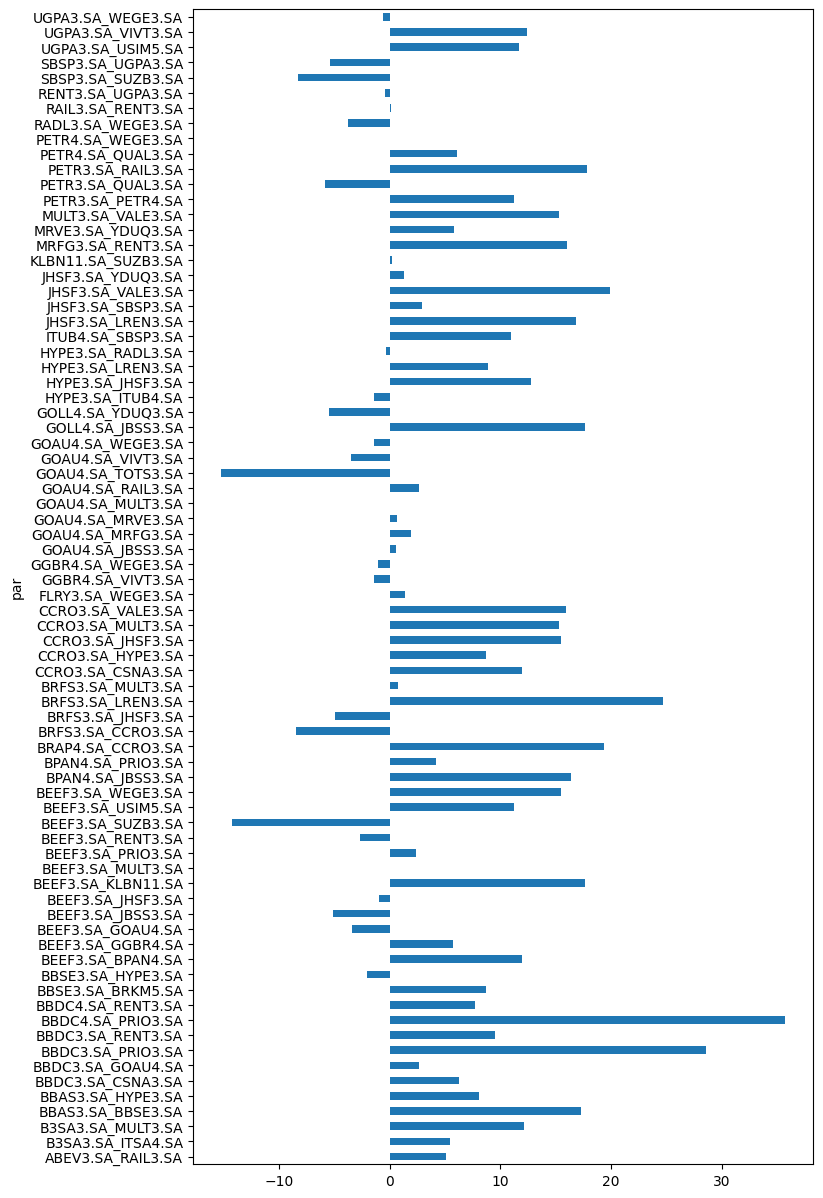

In [53]:
resultados.groupby("par")["total"].sum().mul(100).plot(kind="barh", figsize=(8, 15))

<Axes: >

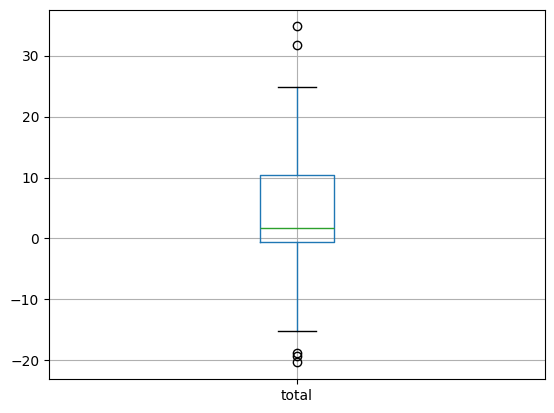

In [54]:
resultados[["total"]].mul(100).boxplot()

In [55]:
resultados[resultados.total == resultados.total.max()]

,par,entrada,saida,preco_entrada_long,preco_entrada_short,preco_saida_long,preco_saida_short,tipo,resultado_long,resultado_short,total
0,BBDC4.SA_PRIO3.SA,2022-10-19,2022-11-09,33.376392,18.100336,37.160316,13.856722,concluido,0.113371,0.234449,0.347821


In [253]:
resultados.set_index("saida").sort_index().total.add(1).cumprod().sub(1).mul(100).plot(figsize=(10,5))

AttributeError: 'DataFrame' object has no attribute 'total'

In [131]:
p1, p2 = base_teste["BBDC4.SA"], base_teste["PRIO3.SA"]

In [132]:
beta, alpha, resid = ols(p1, p2)
half_life = math.ceil(calc_half_life(resid))

sigma = resid.std()
mean = resid.mean()


# avaliacao do spread acima da média
norm_resid = (resid - mean)/sigma
x = norm_resid.to_frame('norm_resid')


<Axes: xlabel='Date'>

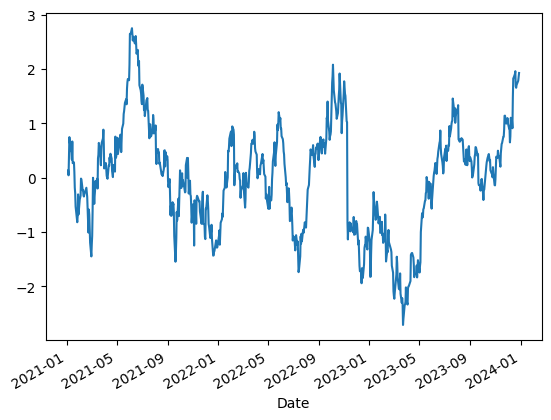

In [133]:
x.norm_resid.plot()

In [134]:

x['entrada_up'] = 0
x['entrada_down']= 0
x['saida_up'] = 0
x['saida_down'] = 0
x['p_saida_long_up'] = 0
x['p_saida_long_down'] = 0
x['p_saida_short_up'] = 0
x['p_saida_short_down'] = 0

In [135]:


def get_crossing_barriers(norm_resid, threshold=2) -> pd.DataFrame:

    """

        parameters:
        -norm_resid: pandas series with normalized residue from OLS of pairs
        - threshold: the threshold to get upper and lower barriers 

        returns a dataframe with columns:
        -norm_resid: the residue series
        -entry_up: consecutive points that the series crossed the upper band for the first time.
        -entry_down: consecutive points that the series crossed the lower band for the first time.
        
    """

    x = norm_resid.to_frame('norm_resid')

    x["entry_up"] = 0
    x["entry_down"] = 0

    # upper crossing
    end_occurrence = None
    for i, dt in enumerate(x.norm_resid.index):
        
        if x.loc[dt, "norm_resid"] >= threshold and end_occurrence is None:
            
            mask = x.loc[dt:, 'norm_resid'] <= threshold
            mask = mask.reindex(x.index, fill_value=False)

            # testar pra ver se tem saida de fato
            if len(mask[mask]) > 0:
                end_dt = mask[mask].index[0]

                end_occurrence = end_dt
                x.loc[dt, "entry_up"] = x.loc[dt, "norm_resid"]
            
            else:
                break
        elif (end_occurrence != None) and (end_occurrence >= dt):
            continue

        elif (end_occurrence != None) and (end_occurrence < dt):

            end_occurrence = None


    # down crossing
    end_occurrence = None
    for i, dt in enumerate(x.norm_resid.index):
        
        if x.loc[dt, "norm_resid"] <= -threshold and end_occurrence is None:
            mask = x.loc[dt:, 'norm_resid'] >= -threshold
            mask = mask.reindex(x.index, fill_value=False)

            # testar pra ver se tem saida de fato
            if len(mask[mask]) > 0:
                end_dt = mask[mask].index[0]

                end_occurrence = end_dt

                x.loc[dt, "entry_down"] = x.loc[dt, "norm_resid"]
            
            else:
                break
        elif (end_occurrence != None) and (end_occurrence >= dt):
            continue

        elif (end_occurrence != None) and (end_occurrence < dt):
            end_occurrence = None

    return x



In [136]:
x = get_crossing_barriers(norm_resid=norm_resid)

In [137]:
x[x.entry_up != 0]

,norm_resid,entry_up,entry_down
Date,,,
2021-06-01,2.077816,2.077816,0.0
2022-10-05,2.079241,2.079241,0.0


In [138]:
x['exit_up'] = 0
x['exit_price_long_up'] = 0
x['exit_price_short_up'] = 0

In [50]:
from datetime import timedelta

,norm_resid,entry_up,entry_down
Date,,,
2021-01-04,-0.583024,0.0,0.0
2021-01-05,-0.769916,0.0,0.0
2021-01-06,-0.621714,0.0,0.0
2021-01-07,-0.674711,0.0,0.0
2021-01-08,-0.775964,0.0,0.0
...,...,...,...
2023-12-21,-2.767861,0.0,0.0
2023-12-22,-2.612817,0.0,0.0
2023-12-26,-2.720875,0.0,0.0


In [111]:

pair1 = 'BBDC4.SA'
pair2 = 'PRIO3.SA'

up_entries_dt = x[x.entry_up != 0].index

print("numero de entradas", len(up_entries_dt))
series_tail = max(x.index)


trades = []
x['exit_up'] = 0 
x['exit_price_long_up'] = 0
x['exit_price_short_up'] = 0
end_threshold = 0.5
for data in up_entries_dt:

    half_life_date = min( (data + timedelta(half_life)), series_tail)


    print("Trading period: start trade", data, "end trade", half_life_date)
    trading_period = x.loc[data:half_life_date]

    closest_date = trading_period.index.get_loc(half_life_date, method='nearest')


    half_life_date = trading_period.index[closest_date]

    
    entry_price_long = close_prices[pair2].loc[data]
    entry_price_short = close_prices[pair1].loc[data]

    for t in  trading_period.index:
        exit_price_long = exit_price_short = 0
        if (x.loc[t].norm_resid <= end_threshold):
            
            print('entrou no if')
            trade_type = "success"
            exit_price_long = close_prices[pair2].loc[t]
            exit_price_short = close_prices[pair1].loc[t]
            x['exit_up'].loc[t] = x.loc[t].norm_resid
            x['exit_price_long_up'].loc[t] = exit_price_long
            x['exit_price_short_up'].loc[t] = exit_price_short
            trades.append([pair1 + "_" + pair2, data, t, entry_price_long, entry_price_short, exit_price_long, exit_price_short, trade_type])
            break
        else:
            pass

    if (exit_price_long == 0):
        print('entrou no if halflife')
        trade_type = "half_life"
        exit_price_long = close_prices[pair2].loc[half_life_date]
        exit_price_short = close_prices[pair1].loc[half_life_date]
        x['exit_up'].loc[t] = x.loc[half_life_date].norm_resid
        x['exit_price_long_up'].loc[t] = p_saida_long
        x['exit_price_short_up'].loc[t] = p_saida_long
        trades.append([pair1 + "_" + pair2, data, t, entry_price_long, entry_price_short, exit_price_long, exit_price_short, trade_type])




numero de entradas 6
Trading period: start trade 2022-11-22 00:00:00 end trade 2023-01-27 00:00:00
entrou no if halflife
Trading period: start trade 2022-12-13 00:00:00 end trade 2023-02-17 00:00:00
entrou no if halflife
Trading period: start trade 2022-12-26 00:00:00 end trade 2023-03-02 00:00:00
entrou no if halflife
Trading period: start trade 2023-01-19 00:00:00 end trade 2023-03-26 00:00:00
entrou no if halflife
Trading period: start trade 2023-01-24 00:00:00 end trade 2023-03-31 00:00:00
entrou no if halflife
Trading period: start trade 2023-02-24 00:00:00 end trade 2023-05-01 00:00:00
entrou no if halflife


In [112]:
x[x.exit_up != 0]

,norm_resid,entry_up,entry_down,exit_up,exit_price_long_up,exit_price_short_up
Date,,,,,,
2023-01-27,1.704172,0.0,0.0,1.704172,36.554333,36.554333
2023-02-17,1.591616,0.0,0.0,1.591616,36.554333,36.554333
2023-03-02,1.843022,0.0,0.0,1.843022,36.554333,36.554333
2023-03-24,1.555617,0.0,0.0,1.555617,36.554333,36.554333
2023-03-31,1.668044,0.0,0.0,1.668044,36.554333,36.554333
2023-04-28,1.285854,0.0,0.0,1.285854,36.554333,36.554333


In [113]:
pd.DataFrame(trades, columns=['pair', 'entry_date', 'exit_date', 'entry_price_long',
                               'entry_price_short', 'exit_price_long', 'exit_price_short', 'trade_type'])

,pair,entry_date,exit_date,entry_price_long,entry_price_short,exit_price_long,exit_price_short,trade_type
0,PETR3.SA_PETR4.SA,2022-11-22,2023-01-27,18.026270,21.424906,19.795671,22.881737,half_life
1,PETR3.SA_PETR4.SA,2022-12-13,2023-02-17,18.018541,21.321978,20.429258,23.507225,half_life
2,PETR3.SA_PETR4.SA,2022-12-26,2023-03-02,19.270262,22.541283,19.038462,22.137486,half_life
3,PETR3.SA_PETR4.SA,2023-01-19,2023-03-24,20.004293,23.356791,17.609032,20.316448,half_life
4,PETR3.SA_PETR4.SA,2023-01-24,2023-03-31,20.552885,23.982277,18.118990,20.973606,half_life
5,PETR3.SA_PETR4.SA,2023-02-24,2023-04-28,20.012018,23.420132,20.627995,23.498644,half_life


In [124]:
close_prices['PETR4.SA'].loc['2022-11-22']

18.026269912719727

In [115]:
resultados[resultados.par =='PETR3.SA_PETR4.SA']

,par,entrada,saida,preco_entrada_long,preco_entrada_short,preco_saida_long,preco_saida_short,tipo,resultado_long,resultado_short,total
0,PETR3.SA_PETR4.SA,2022-02-11,2022-02-18,16.320700,18.056702,15.953291,17.411127,concluido,-0.022512,0.035753,0.013241
1,PETR3.SA_PETR4.SA,2022-03-31,2022-04-04,17.105328,16.170837,16.925730,15.808261,meia vida down,-0.010500,0.022422,0.011922
0,PETR3.SA_PETR4.SA,2022-11-28,2022-12-05,18.822113,22.303757,19.795671,23.143017,meia vida,0.051724,-0.037629,0.014096
1,PETR3.SA_PETR4.SA,2022-12-28,2023-01-02,19.162085,22.565037,17.709478,20.720245,concluido,-0.075806,0.081754,0.005948
2,PETR3.SA_PETR4.SA,2022-11-18,2022-11-22,21.400311,19.283022,21.424906,18.026270,down concluido,0.001149,0.065174,0.066323
3,PETR3.SA_PETR4.SA,2022-12-14,2022-12-20,19.231745,16.589113,20.720245,17.825377,down concluido,0.077398,-0.074523,0.002876


In [160]:
def clean_entries(x, half_life, col_type):

    signals = x[x[col_type] != 0]
    # calculates de time delta between the signals, to compare to the half life
    signals["timedelta"] = signals.index.diff()

    print(signals)
    # drop everything that is distant from the first entry less than the half life
    
    x.drop(index=signals[signals.timedelta.cumsum() < timedelta(half_life)].index, inplace=True)

    return x

In [161]:
x = clean_entries(x, half_life=half_life, col_type="entrada_up")

            norm_resid  entrada_up  entrada_down  saida_up  saida_down  \
Date                                                                     
2023-06-19    2.099551    2.099551           0.0         0           0   
2023-11-29    2.092477    2.092477           0.0         0           0   
2023-11-30    2.471540    2.471540           0.0         0           0   
2023-12-01    2.609359    2.609359           0.0         0           0   
2023-12-04    2.586245    2.586245           0.0         0           0   
2023-12-05    2.620382    2.620382           0.0         0           0   
2023-12-06    2.372686    2.372686           0.0         0           0   
2023-12-07    2.441060    2.441060           0.0         0           0   
2023-12-08    2.564908    2.564908           0.0         0           0   
2023-12-11    2.542811    2.542811           0.0         0           0   
2023-12-12    2.183076    2.183076           0.0         0           0   
2023-12-13    2.334104    2.334104    

In [159]:
x[x.entrada_up !=0]

,norm_resid,entrada_up,entrada_down,saida_up,saida_down,p_saida_long_up,p_saida_long_down,p_saida_short_up,p_saida_short_down
Date,,,,,,,,,
2023-06-19,2.099551,2.099551,0.0,0,0,0,0,0,0
2023-11-29,2.092477,2.092477,0.0,0,0,0,0,0,0
2023-11-30,2.471540,2.471540,0.0,0,0,0,0,0,0
2023-12-01,2.609359,2.609359,0.0,0,0,0,0,0,0
2023-12-04,2.586245,2.586245,0.0,0,0,0,0,0,0
2023-12-05,2.620382,2.620382,0.0,0,0,0,0,0,0
2023-12-06,2.372686,2.372686,0.0,0,0,0,0,0,0
2023-12-07,2.441060,2.441060,0.0,0,0,0,0,0,0
2023-12-08,2.564908,2.564908,0.0,0,0,0,0,0,0


In [32]:
x

,norm_resid,entry_up,entry_down
Date,,,
2021-01-04,-1.182374,0,0.0
2021-01-05,-1.179499,0,0.0
2021-01-06,-1.297457,0,0.0
2021-01-07,-1.418242,0,0.0
2021-01-08,-1.389144,0,0.0
...,...,...,...
2023-12-21,0.862889,0,0.0
2023-12-22,0.743456,0,0.0
2023-12-26,0.723658,0,0.0


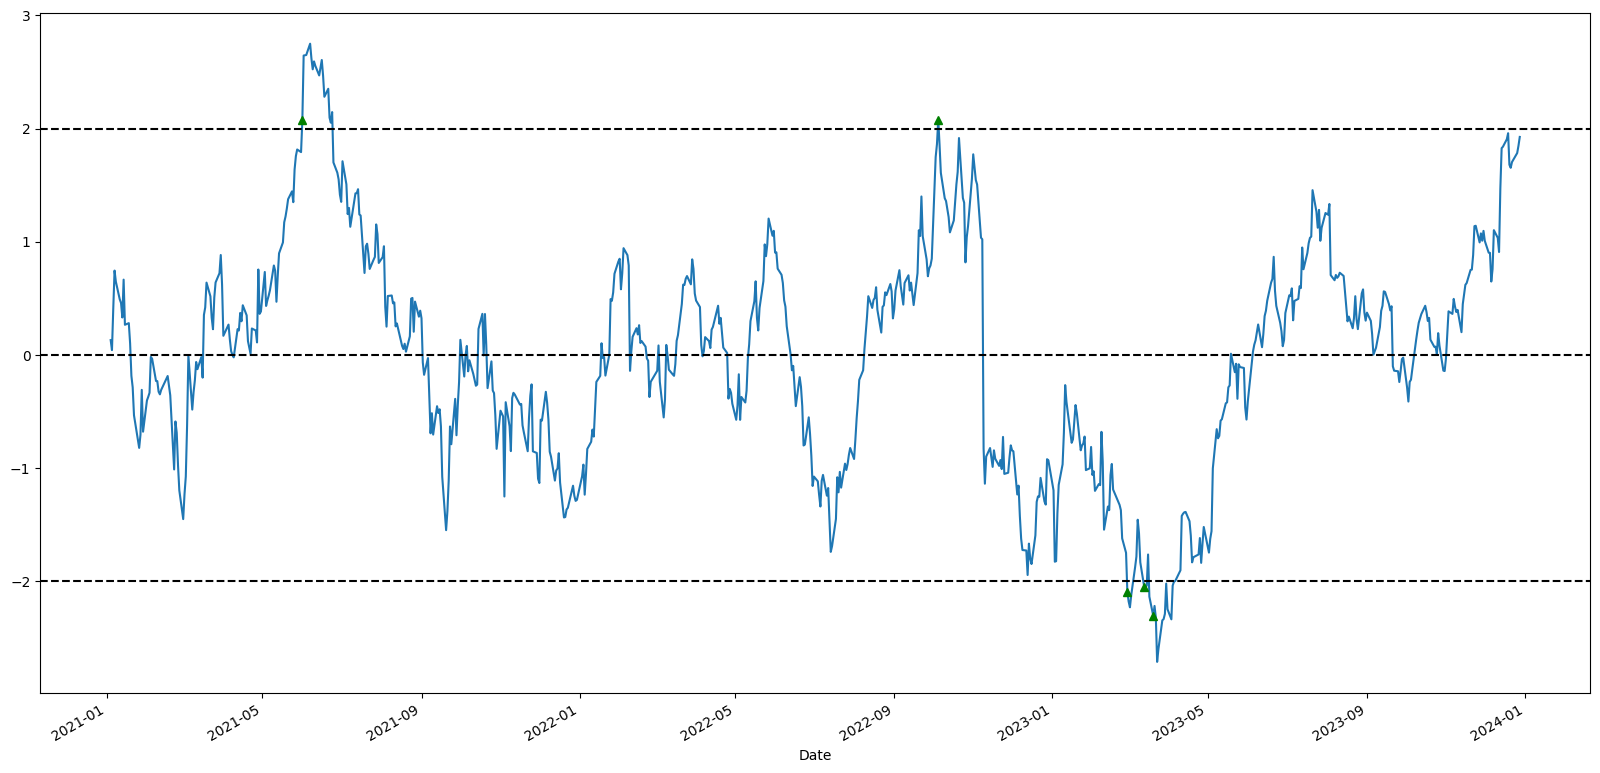

In [139]:
x.norm_resid.plot(figsize=(20,10))


x.entry_up[(x.entry_up != 0)].plot(color='g', linestyle='None', marker='^')
x.entry_down[(x.entry_down != 0)].plot(color='g', linestyle='None', marker='^')
#x.saida_up[(x.saida_up != 0)].plot(color='darkblue', linestyle='None', marker='v')
#x.saida_down[(x.saida_down != 0)].plot(color='darkblue', linestyle='None', marker='v')

plt.axhline(y=norm_resid.mean(), color='black', linestyle='--')
plt.axhline(y=2, color='black', linestyle='--')
plt.axhline(y=-2, color='black', linestyle='--')

In [72]:
vale_brap = yf.download(["BBAS3.SA", "ITUB4.SA"], start="2018-01-01", end="2019-01-31")

[*********************100%%**********************]  2 of 2 completed


In [73]:
vale_brap = vale_brap["Adj Close"]

In [74]:
vale_brap

Ticker,BBAS3.SA,ITUB4.SA
Date,,
2018-01-02,22.805361,21.728256
2018-01-03,23.096228,21.876818
2018-01-04,23.317846,22.332363
2018-01-05,23.317846,22.396749
2018-01-08,23.373243,22.322458
...,...,...
2019-01-23,35.543327,29.605486
2019-01-24,35.362717,29.566055
2019-01-28,34.907589,30.094448


In [84]:
beta, alpha, resid = ols(vale_brap["BBAS3.SA"], vale_brap["ITUB4.SA"])

In [76]:
stationarity_bool(resid)

True

<Axes: xlabel='Date'>

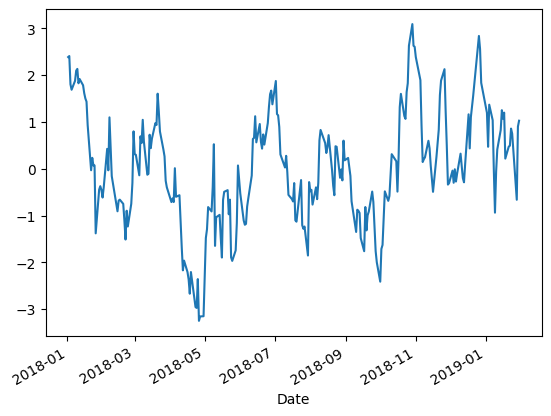

In [85]:
resid.plot()

In [77]:
norm_resid = (resid - resid.mean())/(resid.std())

<Axes: xlabel='Date'>

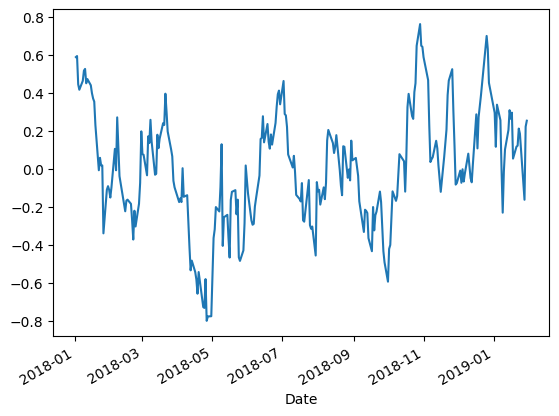

In [86]:
norm_resid.plot()

In [87]:
# avaliacao do spread acima da média
norm_resid = (resid - resid.mean())/resid.std()
x = norm_resid.to_frame('norm_resid')
x['entrada_up'] = np.where((x.norm_resid >= 2) & (x.norm_resid.shift() <= 2), x.norm_resid,0 )
x['entrada_down']= np.where((x.norm_resid <= -2) & (x.norm_resid.shift() >= -2), x.norm_resid,0 )
x['saida_up'] = 0
x['saida_down'] = 0
x['p_saida_long_up'] = 0
x['p_saida_long_down'] = 0
x['p_saida_short_up'] = 0
x['p_saida_short_down'] = 0

In [94]:
x["timedelta"] = x.index.diff()

In [96]:
x.dtypes

norm_resid                    float64
entrada_up                    float64
entrada_down                  float64
saida_up                        int64
saida_down                      int64
p_saida_long_up                 int64
p_saida_long_down               int64
p_saida_short_up                int64
p_saida_short_down              int64
timedelta             timedelta64[ns]
dtype: object

In [98]:
from datetime import timedelta

In [99]:
timedelta(10)

datetime.timedelta(days=10)

In [101]:
x.timedelta.max()

Timedelta('5 days 00:00:00')

In [129]:
x[x.entrada_down != 0]

,norm_resid,entrada_up,entrada_down,saida_up,saida_down,p_saida_long_up,p_saida_long_down,p_saida_short_up,p_saida_short_down,timedelta
Date,,,,,,,,,,
2018-04-18,-2.200751,0.0,-2.200751,0,0,0,0,0,0,1 days


In [128]:
x = clean_entries(x, half_life=10, col_type="entrada_down")

In [110]:
x.loc["2018-10-26":]

,norm_resid,entrada_up,entrada_down,saida_up,saida_down,p_saida_long_up,p_saida_long_down,p_saida_short_up,p_saida_short_down,timedelta
Date,,,,,,,,,,
2018-10-26,2.167942,2.167942,0.0,0,0,0,0,0,0,1 days
2018-10-29,2.549910,0.000000,0.0,0,0,0,0,0,0,3 days
2018-10-30,2.168137,0.000000,0.0,0,0,0,0,0,0,1 days
2018-10-31,2.150394,0.000000,0.0,0,0,0,0,0,0,1 days
2018-11-01,1.968167,0.000000,0.0,0,0,0,0,0,0,1 days
...,...,...,...,...,...,...,...,...,...,...
2019-01-23,0.708579,0.000000,0.0,0,0,0,0,0,0,1 days
2019-01-24,0.618559,0.000000,0.0,0,0,0,0,0,0,1 days
2019-01-28,-0.545565,0.000000,0.0,0,0,0,0,0,0,4 days


In [106]:
x[x.entrada_up ]

,norm_resid,entrada_up,entrada_down,saida_up,saida_down,p_saida_long_up,p_saida_long_down,p_saida_short_up,p_saida_short_down,timedelta
Date,,,,,,,,,,


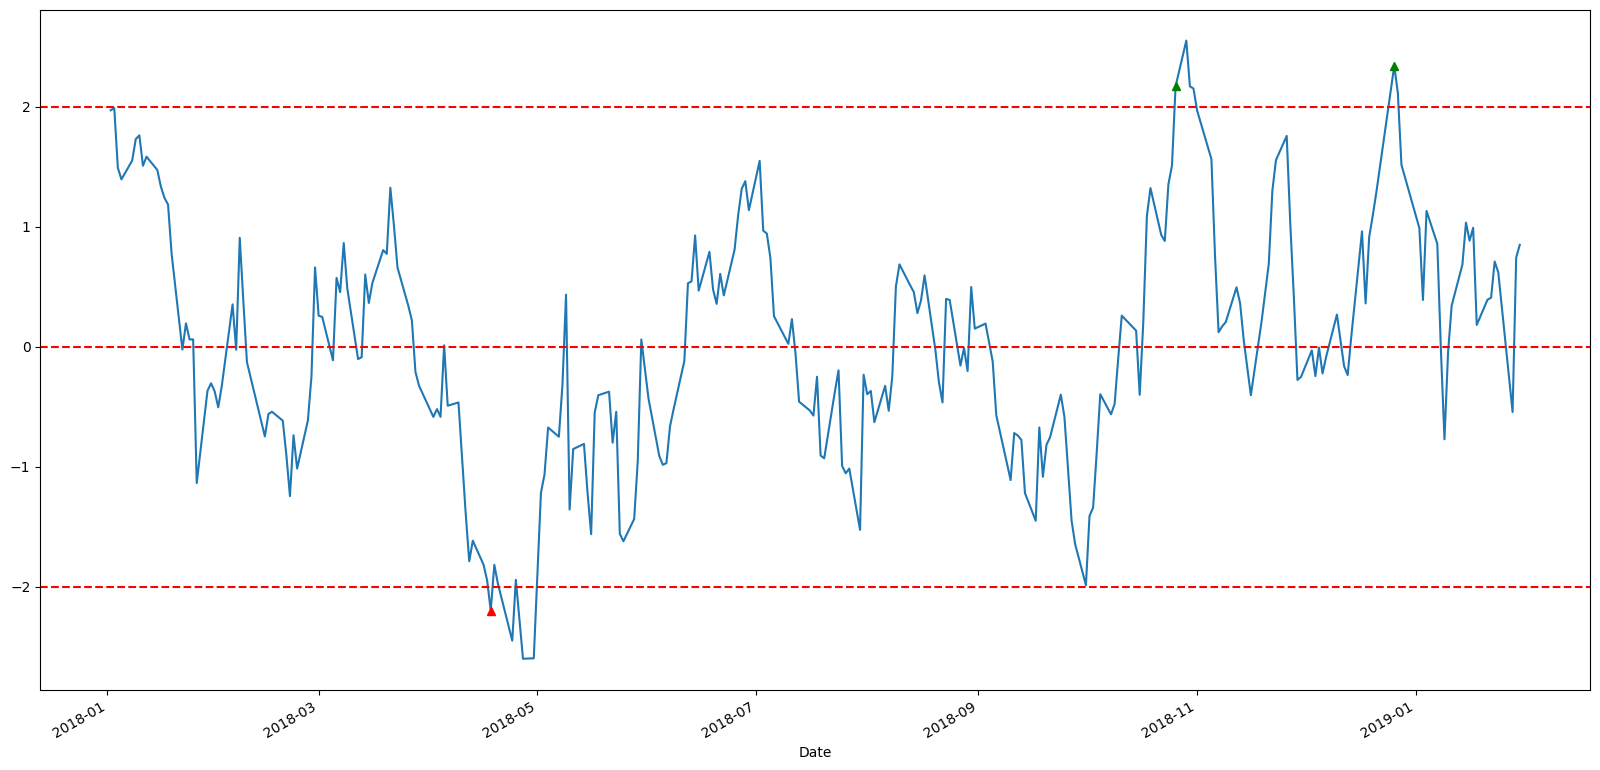

In [130]:
x.norm_resid.plot(figsize=(20,10))


x.entrada_up[(x.entrada_up != 0)].plot(color='g', linestyle='None', marker='^')
x.entrada_down[(x.entrada_down != 0)].plot(color='r', linestyle='None', marker='^')
x.saida_up[(x.saida_up != 0)].plot(color='darkblue', linestyle='None', marker='v')
x.saida_down[(x.saida_down != 0)].plot(color='darkblue', linestyle='None', marker='v')

plt.axhline(y=norm_resid.mean(), color='r', linestyle='--')
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')


<Axes: xlabel='Date'>

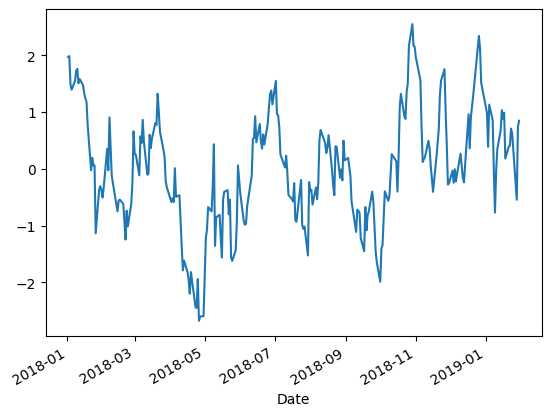

In [222]:
norm_resid.plot()